# Decision Trees: Regression on House Pricing Dataset
We consider a reduced version of a dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

https://www.kaggle.com/harlfoxem/housesalesprediction

For each house we know 18 house features (e.g., number of bedrooms, number of bathrooms, etc.) plus its price, that is what we would like to predict.

## Insert your ID number ("numero di matricola") below

In [1]:
#put here your ``numero di matricola''
numero_di_matricola = 2019286

In [2]:
#import all packages needed
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data, remove data samples/points with missing values (NaN) and take a look at them.

In [3]:
#load the data
df = pd.read_csv('kc_house_data.csv', sep = ',')

#remove the data samples with missing values (NaN)
df = df.dropna() 

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.164000e+03,3.164000e+03,3164.000000,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,4.645240e+09,5.354358e+05,3.381163,2.071903,2070.027813,1.525054e+04,1.434893,0.009798,0.244311,3.459229,7.615676,1761.252212,308.775601,1967.489254,94.668774,98077.125158,47.557868,-122.212337,1982.544564,13176.302465
std,2.854203e+09,3.809004e+05,0.895472,0.768212,920.251879,4.254457e+04,0.507792,0.098513,0.776298,0.682592,1.166324,815.934864,458.977904,28.095275,424.439427,54.172937,0.140789,0.139577,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.199775e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.453750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459575,-122.324250,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1969.000000,0.000000,98059.000000,47.572500,-122.226000,1830.000000,7873.000000
75%,7.358175e+09,6.402500e+05,4.000000,2.500000,2500.000000,1.122250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680250,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


Extract input and output data. We want to predict the price by using features other than id as input.

In [4]:
Data = df.values
# m = number of input samples
m = Data.shape[0]
print("Amount of data:",m)
Y = Data[:m,2]
X = Data[:m,3:]

feature_names = df.columns[3:]

Amount of data: 3164


## Data Pre-Processing

We split the $m$ samples of the data into 3 parts: one will be used for training and choosing the parameters, one for choosing among different models, and one for testing. The part for training and choosing the parameters will consist of $m_{train}=2/3 m$ samples, the one for choosing among different models will consist of $m_{val}= (m - m_{train})/2$ sampels, while the other part consists of $m_{test}=m - m_{train} - m_{val}$ samples.

In [5]:
# Split data into train (2/3 of samples), validation (1/6 of samples), and test data (the rest)
m_train = int(2./3.*m)
m_val = int((m-m_train)/2.)
m_test = m - m_train - m_val
print("Amount of data for training and deciding parameters:",m_train)
print("Amount of data for validation (choosing among different models):",m_val)
print("Amount of data for test:",m_test)
from sklearn.model_selection import train_test_split

Xtrain_and_val, Xtest, Ytrain_and_val, Ytest = train_test_split(X, Y, test_size=m_test/m, random_state=numero_di_matricola)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain_and_val, Ytrain_and_val, test_size=m_val/(m_train+m_val), random_state=numero_di_matricola)

Amount of data for training and deciding parameters: 2109
Amount of data for validation (choosing among different models): 527
Amount of data for test: 528


Let's standardize the data.

In [6]:
# Data pre-processing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)
Xtrain_and_val_scaled = scaler.transform(Xtrain_and_val)
Xval_scaled = scaler.transform(Xval)
Xtest_scaled = scaler.transform(Xtest)

## Neural Networks
Let's learn the best neural network with 1 hidden layer and between 1 and 9 hidden nodes, choosing the best number of hidden nodes with cross-validation.

In [7]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

mlp_cv = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(1,10)],
              'activation': ['relu'],
              'solver': ['lbfgs'], 
              'random_state': [numero_di_matricola]
             }
mlp_GS = GridSearchCV(mlp_cv, param_grid=param_grid, 
                   cv=5, verbose=True)
mlp_GS.fit(Xtrain_and_val_scaled, Ytrain_and_val)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/nicolafarronato/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/nicolafarronato/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/nicolafarronato/opt/anaconda3/lib/python3.8/

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'random_state': [2019286], 'solver': ['lbfgs']},
             verbose=True)

Now let's check what is the best parameter, and compare the best NNs with the linear model (learned on train and validation) on test data.

In [8]:
#let's print the best model according to grid search
print("Best model: ",mlp_GS.best_estimator_)
#let's print the error 1-R^2 for the best model
print("Error (1-R^2) of best model: ",1. - mlp_GS.best_score_)

Best model:  MLPRegressor(hidden_layer_sizes=5, random_state=2019286, solver='lbfgs')
Error (1-R^2) of best model:  0.21691436921100093


Let's learn the best NN using all of training and validation, and then compare the error of the best NN on train and validation and on test data.

In [9]:
best_mlp = MLPRegressor(hidden_layer_sizes=(5,),activation='relu', solver='lbfgs',random_state=numero_di_matricola)
best_mlp.fit(Xtrain_and_val_scaled,Ytrain_and_val)

print("Error of best model on train and validation data: ", 1.-best_mlp.score(Xtrain_and_val_scaled,Ytrain_and_val))
print("Error of best model on test data: ", 1.-best_mlp.score(Xtest_scaled,Ytest))

Error of best model on train and validation data:  0.1544914063354612
Error of best model on test data:  0.22135721333613212


/Users/nicolafarronato/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Linear Regression

Now let's learn the linear model on train and validation, and get error (1-R^2) on train and validation and on test data.

In [10]:
from sklearn import linear_model
#LR the linear regression model
LR = linear_model.LinearRegression()

#fit the model on training data
LR.fit(Xtrain_and_val_scaled, Ytrain_and_val)

print("1 - coefficient of determination on training data:"+str(1 - LR.score(Xtrain_and_val_scaled,Ytrain_and_val)))
print("1 - coefficient of determination on test data:"+str(1 - LR.score(Xtest_scaled,Ytest)))

1 - coefficient of determination on training data:0.2685680452012348
1 - coefficient of determination on test data:0.34755904295157714


Note: MLPRegressor has several other parameters!

# Decision trees

Let's learn a decision tree without any limitation.

In [13]:
#import the proper module
from sklearn.tree import DecisionTreeRegressor

#define the model
DT = DecisionTreeRegressor( random_state = numero_di_matricola)

#learn the model 
DT.fit(Xtrain_scaled,Ytrain)

#print error on training and on validation
print("1 - R^2 on training data:"+str(1 - DT.score(Xtrain_scaled,Ytrain)))
print("1 - R^2 on valid data:"+str(1 - DT.score(Xval_scaled,Yval)))

1 - R^2 on training data:0.0005419433610099889
1 - R^2 on valid data:0.4402467438603367


Let's check what are some of the characteristics of the tree, like its depth and the number of nodes...


In [14]:
print("Depth of the tree", DT.tree_.max_depth)
print("Number of nodes of the tree", DT.tree_.node_count)

Depth of the tree 28
Number of nodes of the tree 4095


Let's try to plot the tree.

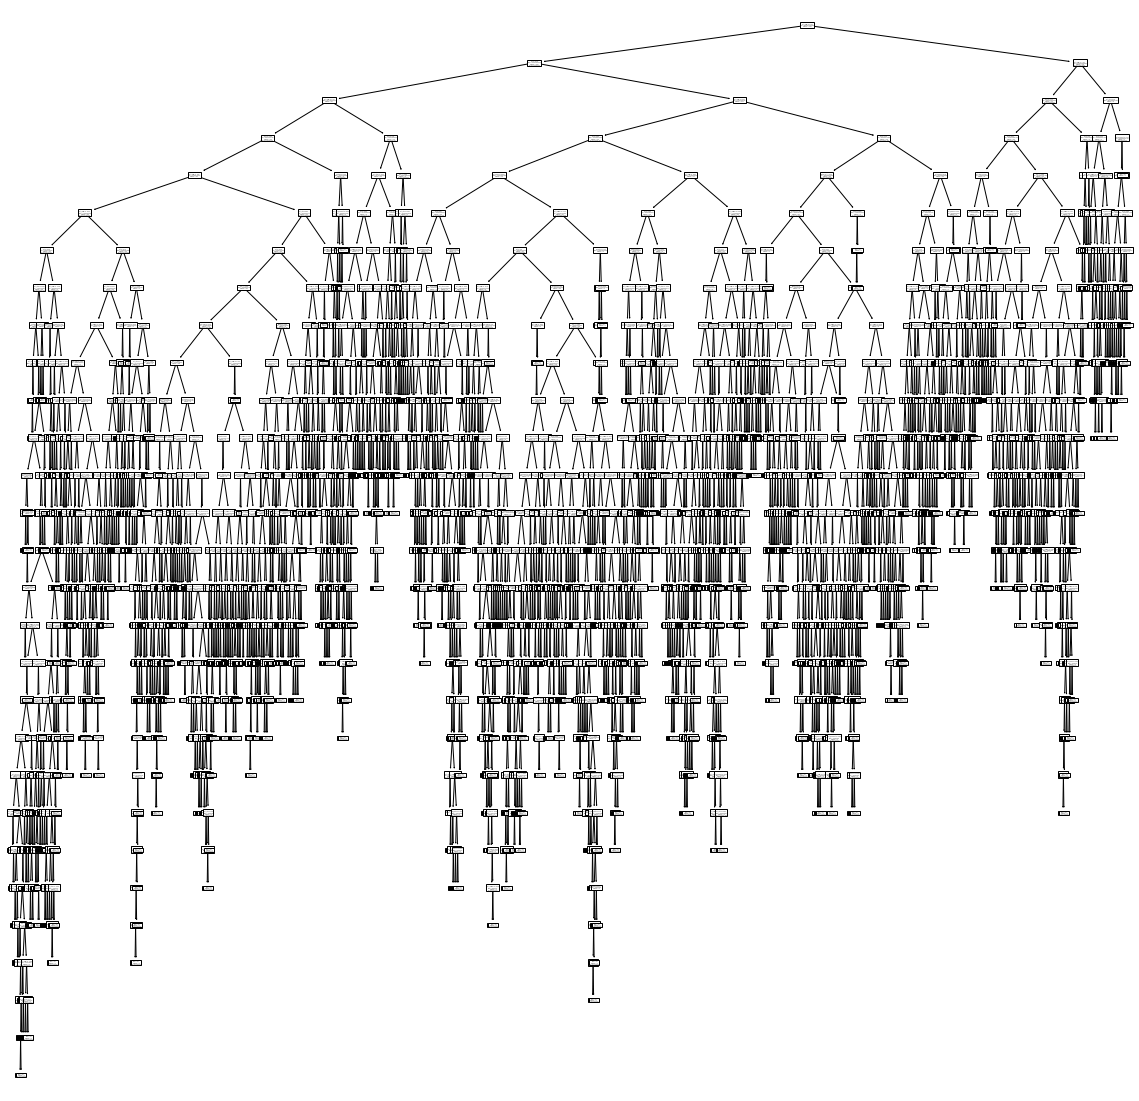

In [16]:
from sklearn import tree

plt.figure(figsize=(20,20))
tree.plot_tree(DT, feature_names=feature_names)
plt.show()

Let's use a max depth of 2.

In [17]:
#define the model
DT2 = DecisionTreeRegressor(max_depth=2, random_state = numero_di_matricola)

#learn the model 
DT2.fit(Xtrain_scaled,Ytrain)

#print error on training and on validation
print("1 - R^2 on training data:"+str(1 - DT2.score(Xtrain_scaled,Ytrain)))
print("1 - R^2 on valid data:"+str(1 - DT2.score(Xval_scaled,Yval)))

1 - R^2 on training data:0.48870935260208426
1 - R^2 on valid data:0.5526638271797105


Let's plot the tree.

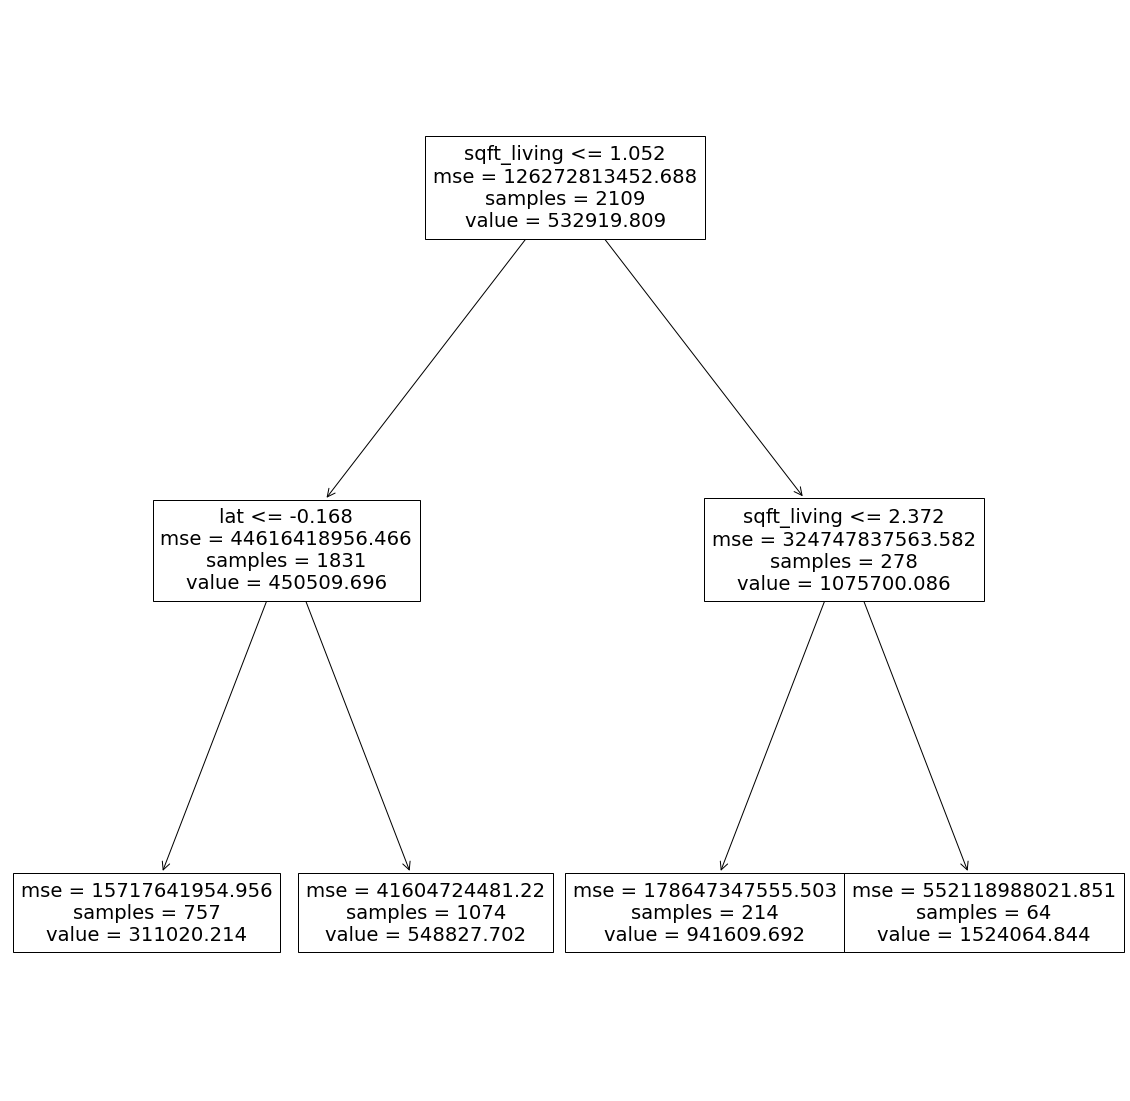

In [18]:
plt.figure(figsize=(20,20))
tree.plot_tree(DT2, feature_names=feature_names)
plt.show()

What happens if we do not normalize the data?

In [19]:
#define the model
DT3 = DecisionTreeRegressor(max_depth=2, random_state = numero_di_matricola)

#learn the model 
DT3.fit(Xtrain,Ytrain)

#print error on training and on validation
print("1 - R^2 on training data:"+str(1 - DT3.score(Xtrain,Ytrain)))
print("1 - R^2 on valid data:"+str(1 - DT3.score(Xval,Yval)))

1 - R^2 on training data:0.48870935260208426
1 - R^2 on valid data:0.5526638271797105


Let's plot the tree

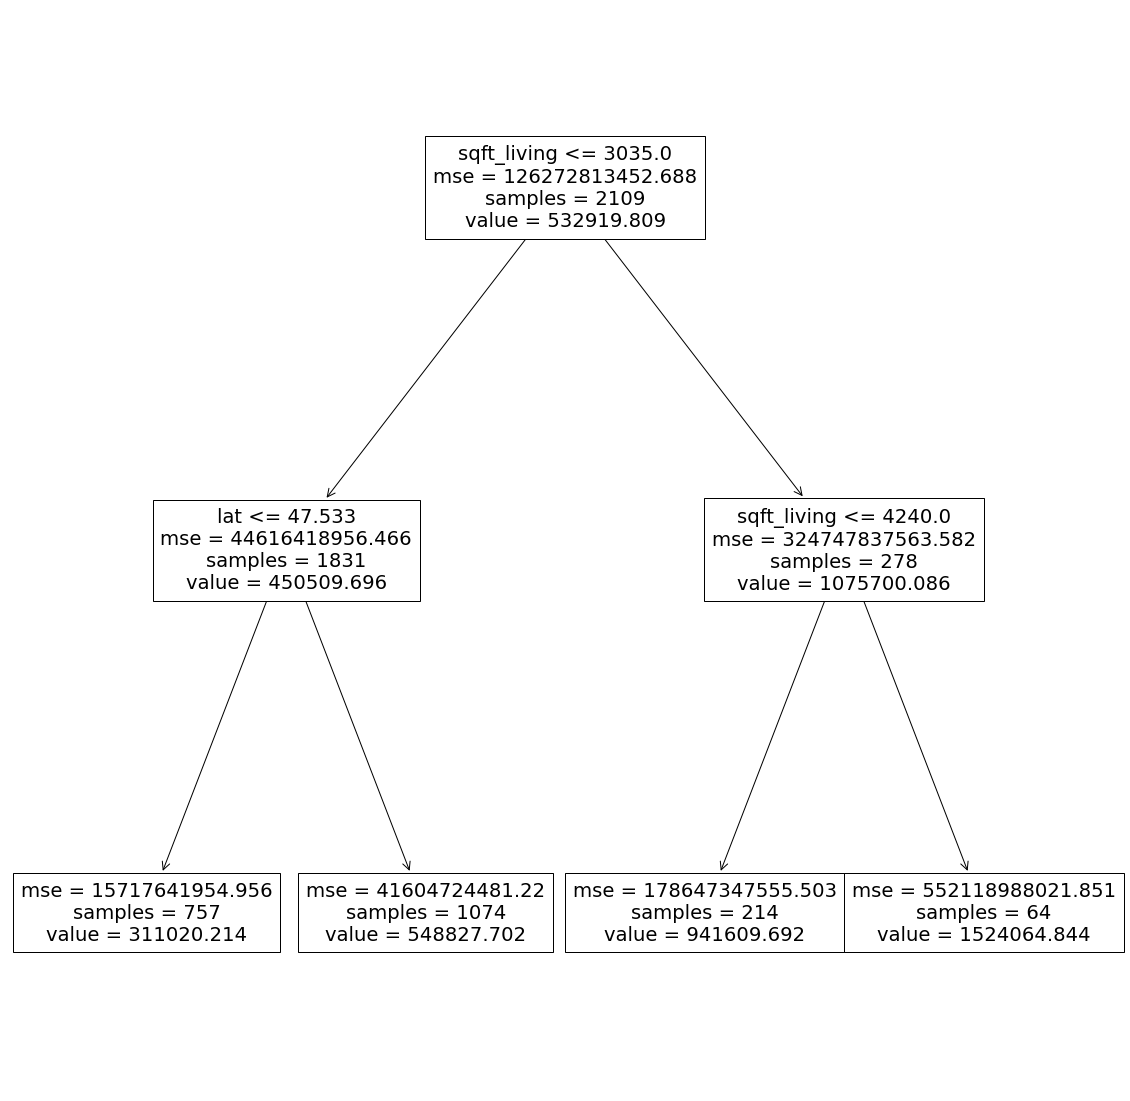

In [23]:
plt.figure(figsize=(20,20))
tree.plot_tree(DT3, feature_names=feature_names)
plt.show()

Let's build a tree of depth 3

In [25]:
#define the model
DT4 = DecisionTreeRegressor(max_depth=6, random_state = numero_di_matricola)

#learn the model 
DT4.fit(Xtrain,Ytrain)

#print error on training and on validation
print("1 - R^2 on training data:"+str(1 - DT4.score(Xtrain,Ytrain)))
print("1 - R^2 on valid data:"+str(1 - DT4.score(Xval,Yval)))

1 - R^2 on training data:0.14679192532717655
1 - R^2 on valid data:0.35461798950472234


Let's plot the tree.

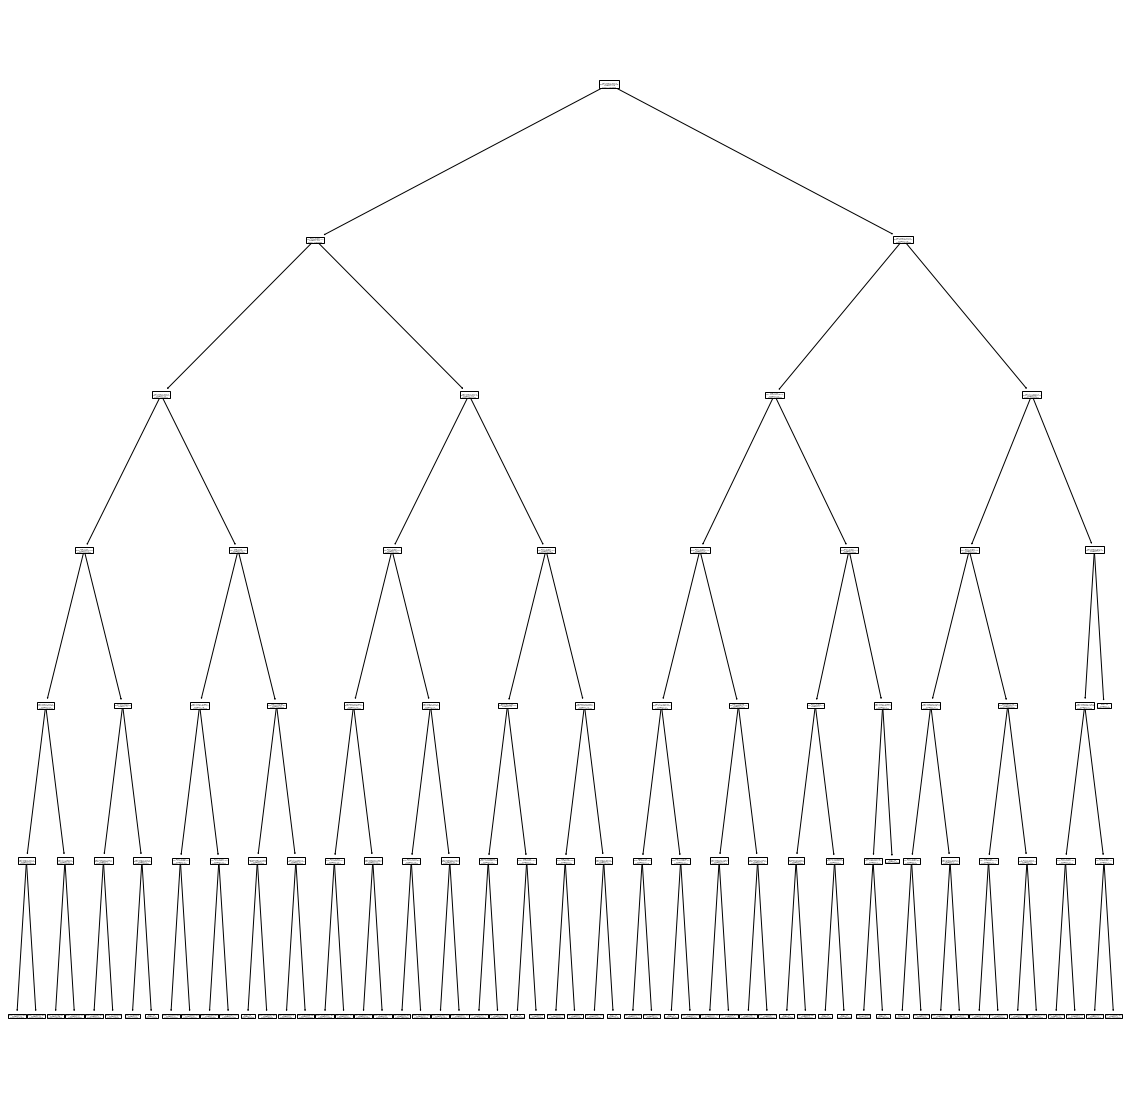

In [26]:
plt.figure(figsize=(20,20))
tree.plot_tree(DT4, feature_names=feature_names)
plt.show()

Let's use cross validation to find the best value of the maximum depth between 1 and 9.

In [ ]:
#complete

Let's see what is the best model

In [ ]:
#complete

Let's learn on all of training and validation

In [ ]:
#complete

We can inspect the importance of each feature.

In [ ]:
#complete

Let's print the names of the most importante features.

In [ ]:
#complete

# Random forest

Let's use random forest without changing parameters.

In [ ]:
#complete

Let run cross-validation on maximum depth.

In [ ]:
#complete

Let's see what is the best model and how it performs.

In [ ]:
#complete

Let's learn on all of training and valiation, and test on test.

In [ ]:
#complete

Let's see the importance of each feature.

In [ ]:
#complete

Let's see the name of the most important features.

In [ ]:
#complete